In [24]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 9e-04
end_value1 = 1e-04

# particle_diameter_1 = 1e-4 
# particle_diameter_2 = 3e-7

start_value2 = 5e-6
end_value2 = 2e-5

column_header =['particle_diameter_1', 'particle_diameter_2']

array1 = np.linspace(start_value1, end_value1, 10)
array2 = np.linspace(start_value2, end_value2, 10)

combinations = list(product(array1, array2))

# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



    particle_diameter_1  particle_diameter_2
0                0.0009             0.000005
1                0.0009             0.000007
2                0.0009             0.000008
3                0.0009             0.000010
4                0.0009             0.000012
..                  ...                  ...
95               0.0001             0.000013
96               0.0001             0.000015
97               0.0001             0.000017
98               0.0001             0.000018
99               0.0001             0.000020

[100 rows x 2 columns]


In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path_600 = 'stochastic_tools_out_600.json'
path_800 = 'stochastic_tools_out_800.json'
path_1000 = 'stochastic_tools_out_1000.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path_600, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df_600 = pd.DataFrame(raw_data)
df_600.columns = ['inlet-p', 'outlet-p','time','converged']
df_600

p_in = df_600['inlet-p'][:].tolist()
t = df_600['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df_600 = pd.DataFrame(data = p_in)
md_df_600 = md_df_600.T
md_df_600 *= 1e-6
md_df_600 = md_df_600.drop(503)
md_df_600 = md_df_600.drop(502)
md_df_600 = md_df_600.drop(501)

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df_600.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df_600







Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.1,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,3.155651,36.038487,4.293339,4.293339,3.782071,4.293339,4.293339,4.293339,4.293339,4.293339
0.2,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.287667,4.287453,4.275318,4.274806,4.286853,4.273843,4.273387,4.272948,4.272524,4.272113
0.3,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.266251,4.265354,4.249211,4.248036,4.262884,4.245834,4.244799,4.243803,4.242845,4.241921
0.4,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.238410,4.236723,4.217490,4.215591,4.232113,4.212045,4.210387,4.208796,4.207269,4.205801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,4.201195,4.201102,4.201034,4.200982,4.200941,4.200908,4.200881,4.200858,4.200839,4.200822,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.7,4.200713,4.200620,4.200551,4.200499,4.200458,4.200425,4.200398,4.200375,4.200355,4.200338,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.8,4.200230,4.200137,4.200068,4.200016,4.199975,4.199942,4.199914,4.199891,4.199872,4.199855,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.9,4.199746,4.199653,4.199584,4.199532,4.199491,4.199458,4.199430,4.199407,4.199387,4.199370,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470


In [26]:
# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path_800, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']

raw_data = data_json['time_steps'][-1]['results']
df_800 = pd.DataFrame(raw_data)
df_800.columns = ['inlet-p', 'outlet-p','time','converged']
df_800

p_in = df_800['inlet-p'][:].tolist()
t = df_800['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df_800 = pd.DataFrame(data = p_in)
md_df_800 = md_df_800.T
md_df_800 *= 1e-6
md_df_800 = md_df_800.drop(508)
md_df_800 = md_df_800.drop(507)
md_df_800 = md_df_800.drop(506)
md_df_800 = md_df_800.drop(505)
md_df_800 = md_df_800.drop(504)
md_df_800 = md_df_800.drop(503)
md_df_800 = md_df_800.drop(502)
md_df_800 = md_df_800.drop(501)

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df_800.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df_800

Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.1,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,6.098955,42.684431,-4109.383225,5.720554,5.720554,5.720554,5.720554
0.2,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.682559,5.680938,5.679367,5.707291,5.716526,5.706272,5.673511,5.672141,5.670804,5.669499
0.3,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.624638,5.620697,5.616886,5.652866,5.698808,5.648171,5.602748,5.599456,5.596250,5.593125
0.4,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.551233,5.544521,5.538041,5.579077,5.636937,5.569774,5.514120,5.508575,5.503184,5.497936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,5.496306,5.496029,5.495827,5.495672,5.495551,5.495452,5.495370,5.495302,5.495244,5.495194,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.7,5.495540,5.495264,5.495061,5.494906,5.494784,5.494685,5.494603,5.494535,5.494477,5.494426,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.8,5.494775,5.494497,5.494294,5.494139,5.494017,5.493918,5.493836,5.493768,5.493709,5.493659,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.9,5.494009,5.493731,5.493528,5.493372,5.493250,5.493151,5.493069,5.493000,5.492942,5.492891,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541


In [27]:
# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path_1000, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']

raw_data = data_json['time_steps'][-1]['results']
df_1000 = pd.DataFrame(raw_data)
df_1000.columns = ['inlet-p', 'outlet-p','time','converged']
df_1000

p_in = df_1000['inlet-p'][:].tolist()
t = df_1000['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df_1000 = pd.DataFrame(data = p_in)
md_df_1000 = md_df_1000.T
md_df_1000 *= 1e-6

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df_1000.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df_1000

Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0.0000,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0125,7.002988,7.002883,7.002980,7.002973,7.002980,7.003649,7.002980,7.003018,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0375,7.002902,6.999774,6.987791,6.998702,6.983952,6.997777,6.980619,6.996958,6.977655,6.976285,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.0875,7.002136,6.982293,6.961822,6.975502,6.951476,6.969673,6.942503,6.964523,6.934533,6.930850,...,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978,7.002978
0.1875,6.998088,6.956187,6.926895,6.941089,6.908006,6.928194,6.891680,6.916847,6.877219,6.870548,...,7.002972,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971,7.002971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6875,0.115794,0.109258,0.106722,0.105485,0.104725,0.104517,0.104493,0.104498,0.104516,0.104520,...,2.486000,2.447826,2.425097,2.410032,2.399319,2.391312,2.385102,2.380145,2.376098,2.372730
49.7875,0.115625,0.109165,0.106658,0.105436,0.104685,0.104517,0.104493,0.104498,0.104516,0.104520,...,2.482129,2.444037,2.421357,2.406325,2.395635,2.387646,2.381450,2.376505,2.372466,2.369106
49.8875,0.115458,0.109073,NaN,0.105388,NaN,0.104517,NaN,0.104498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49.9875,0.115293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df_600.shape[1]): 
    pressure = md_df_600.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
porosity = 0.036
print('Minimum ARMSE 1: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*porosity**3/(1-porosity)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*porosity**3/(1-porosity)
print("K_2 = ", K_2)
print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])
print(min_index_1)

Minimum ARMSE 1: 0.02091749128090772


IndexError: single positional indexer is out-of-bounds

In [ ]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df_600.shape[1]):
    pressure = md_df_600.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE 1: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_2]
print(selected_row)
print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])
print(min_index_2)

Minimum ARMSE 1: 0.0660004733762698
particle_diameter_1    1.147368e-04
particle_diameter_2    3.105263e-07
Name: 63, dtype: float64
particle_diameter_1 =  0.0001147368421052
particle_diameter_2 =  3.105263157894737e-07
63


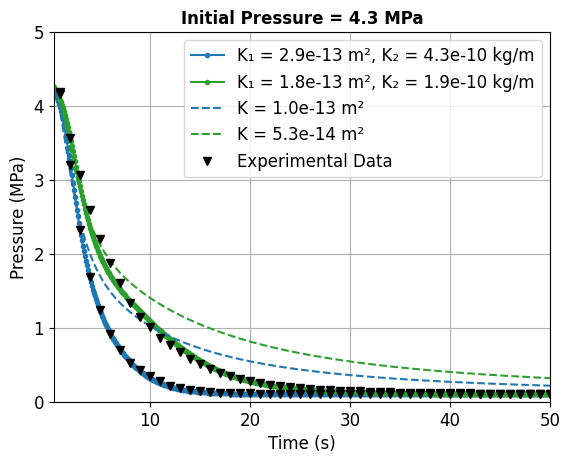

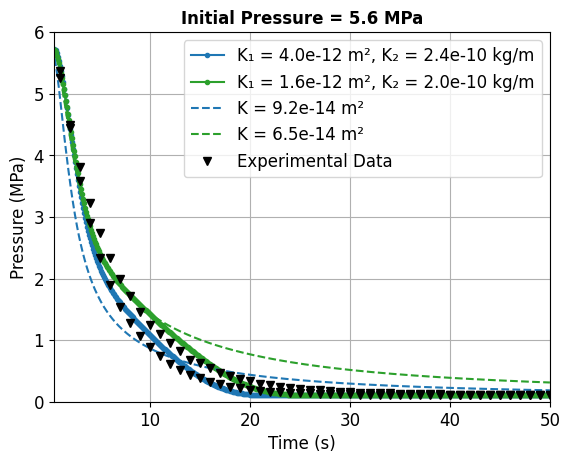

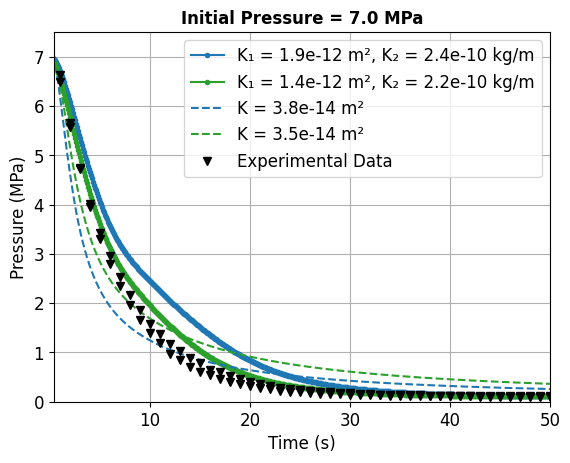

In [ ]:
# Plot all pressure decays
darcy_1_600 = pd.read_csv('model_pellets_1_600.csv')
darcy_2_600 = pd.read_csv('model_pellets_2_600.csv')
darcy_1_800 = pd.read_csv('model_pellets_1_800.csv')
darcy_2_800 = pd.read_csv('model_pellets_2_800.csv')
darcy_1_1000 = pd.read_csv('model_pellets_1_1000.csv')
darcy_2_1000 = pd.read_csv('model_pellets_2_1000.csv')



md_df_600[113].plot(marker='.', color='C0', label='K\u2081 = 2.9e-13 m\u00B2, K\u2082 = 4.3e-10 kg/m')
md_df_600[63].plot(marker='.', color='C2', label='K\u2081 = 1.8e-13 m\u00B2, K\u2082 = 1.9e-10 kg/m')
plt.plot(darcy_1_600['time'], darcy_1_600['inlet-p']/1e6, color='C0', linestyle='--', label='K = 1.0e-13 m\u00B2')
plt.plot(darcy_2_600['time'], darcy_2_600['inlet-p']/1e6, color='C2', linestyle='--', label='K = 5.3e-14 m\u00B2')
plt.plot(data20['time'], data20['TT1_600_1']/1e6, color='k', marker='v', linestyle='')
plt.plot(data20['time'], data20['TT1_600_2']/1e6, color='k', marker='v', linestyle='', label='Experimental Data')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Pressure (MPa)', fontsize=12)
plt.grid()
plt.title('Initial Pressure = 4.3 MPa', weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 12)
plt.xlim(0.4, 50)
plt.ylim(0, 5)
plt.show()





md_df_800[385].plot(marker='.', color='C0', label='K\u2081 = 4.0e-12 m\u00B2, K\u2082 = 2.4e-10 kg/m')
md_df_800[243].plot(marker='.', color='C2', label='K\u2081 = 1.6e-12 m\u00B2, K\u2082 = 2.0e-10 kg/m')
plt.plot(darcy_1_800['time'], darcy_1_800['inlet-p']/1e6, color='C0', linestyle='--', label='K = 9.2e-14 m\u00B2')
plt.plot(darcy_2_800['time'], darcy_2_800['inlet-p']/1e6, color='C2', linestyle='--', label='K = 6.5e-14 m\u00B2')
plt.plot(data20['time'], data20['TT1_800_1']/1e6, color='k', marker='v', linestyle='')
plt.plot(data20['time'], data20['TT1_800_2']/1e6, color='k', marker='v', linestyle='', label='Experimental Data')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Pressure (MPa)', fontsize=12)
plt.grid()
plt.title('Initial Pressure = 5.6 MPa', weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 12)
plt.xlim(0.4, 50)
plt.ylim(0, 6)
plt.show()

 


md_df_1000[0].plot(marker='.', color='C0', label='K\u2081 = 1.9e-12 m\u00B2, K\u2082 = 2.4e-10 kg/m')
md_df_1000[1].plot(marker='.', color='C2', label='K\u2081 = 1.4e-12 m\u00B2, K\u2082 = 2.2e-10 kg/m')
plt.plot(darcy_1_1000['time'], darcy_1_1000['inlet-p']/1e6, color='C0', linestyle='--', label='K = 3.8e-14 m\u00B2')
plt.plot(darcy_2_1000['time'], darcy_2_1000['inlet-p']/1e6, color='C2', linestyle='--', label='K = 3.5e-14 m\u00B2')
plt.plot(data20['time'], data20['TT1_1000_1']/1e6, color='k', marker='v', linestyle='')
plt.plot(data20['time'], data20['TT1_1000_2']/1e6, color='k', marker='v', linestyle='', label='Experimental Data')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Pressure (MPa)', fontsize=12)
plt.grid()
plt.title('Initial Pressure = 7.0 MPa', weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 12)
plt.xlim(0.4, 50)
plt.ylim(0, 7.5)
plt.show()




